# Ensemble Technique Project: Travel Package Purchase Prediction

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Importing necessary libraries

In [140]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [141]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data Science/Data Sets/Tourism.xlsx'

raw_data = pd.read_excel(path, sheet_name='Tourism')

data = raw_data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

### The shape of the dataset.

In [142]:
data.shape

(4888, 20)

### First and last 5 rows of the dataset.

In [143]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [144]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Column data types

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Statistical Summary

In [146]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [147]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [148]:
data = data.drop('CustomerID', axis=1)

### Checking for missing values

In [149]:
data.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Exploratory Data Analysis (Univariate Analysis).

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

In [173]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [174]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

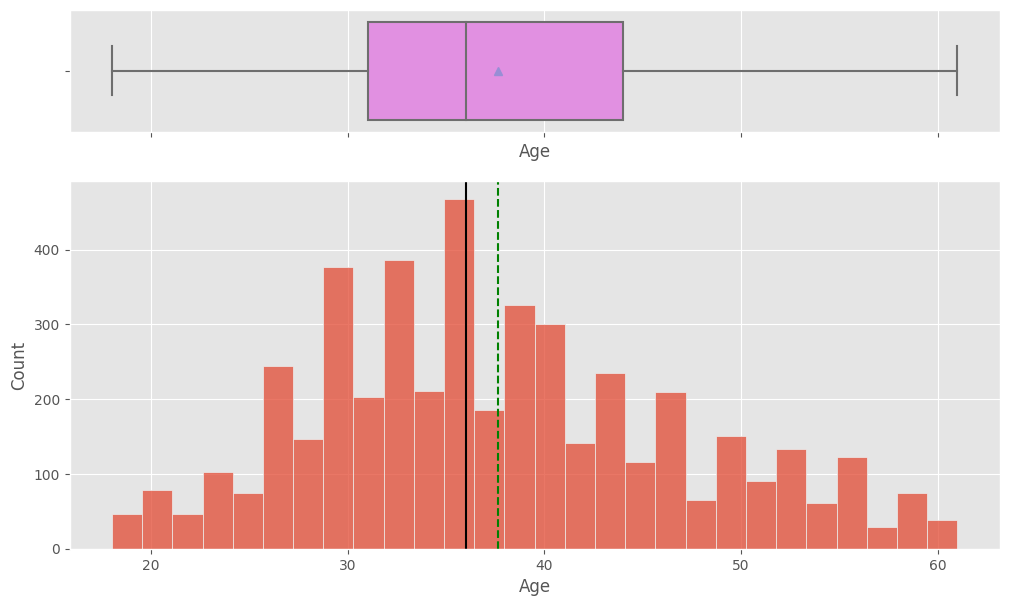

In [175]:
histogram_boxplot(data, "Age")

#### Observations on Duration of Pitch

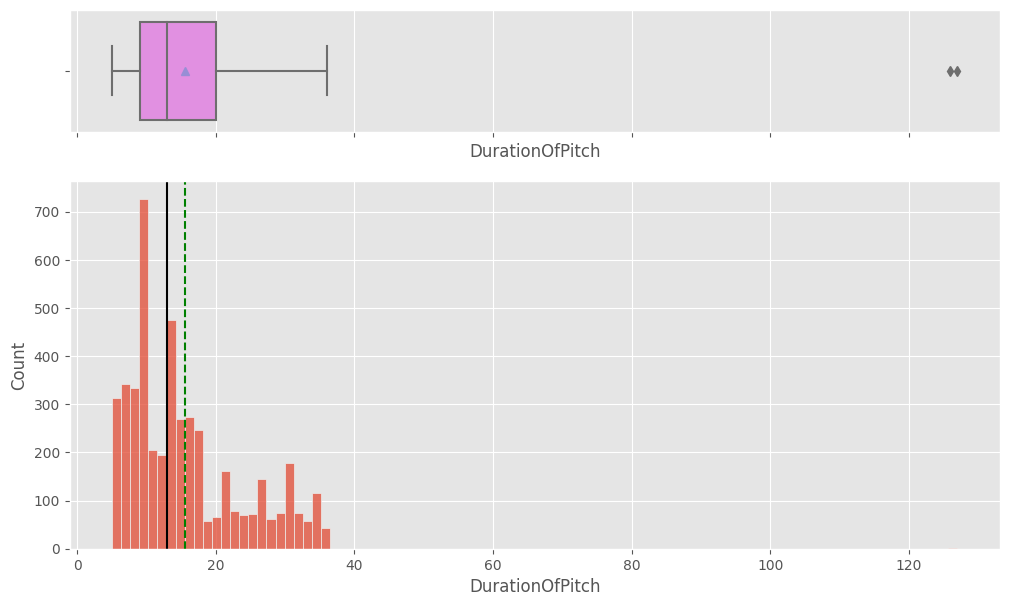

In [153]:
histogram_boxplot(data, 'DurationOfPitch')

### Observations on Monthly Income

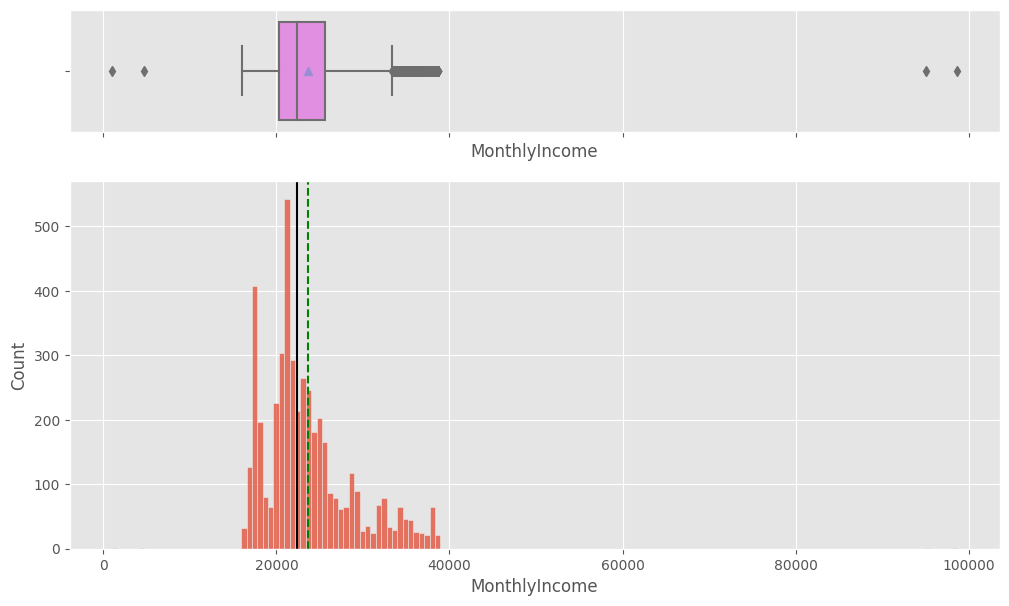

In [154]:
histogram_boxplot(data, 'MonthlyIncome')

### Observations on Number of Trips

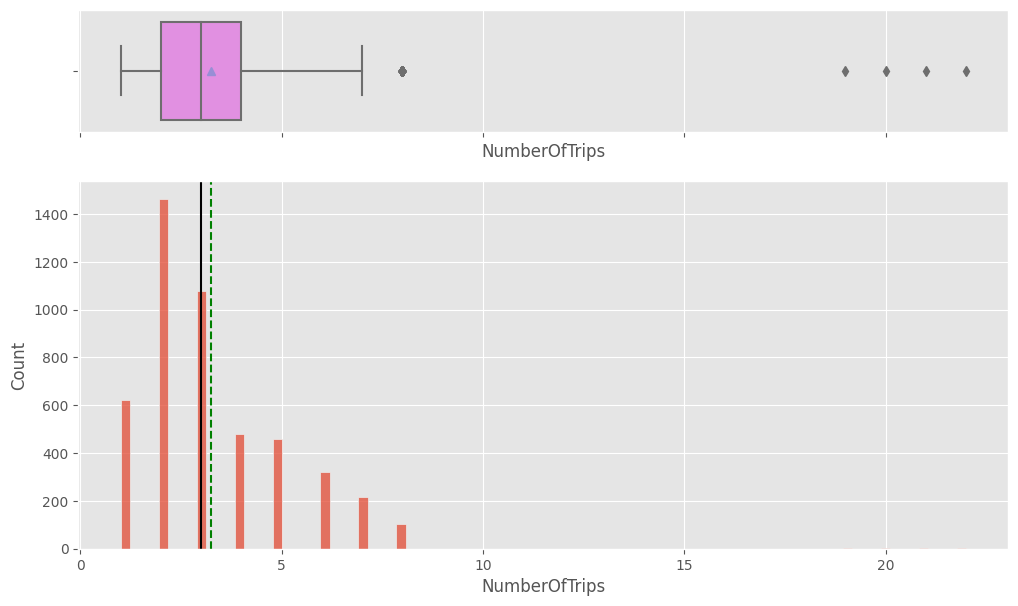

In [155]:
histogram_boxplot(data, 'NumberOfTrips')

#### Observations on Occupation

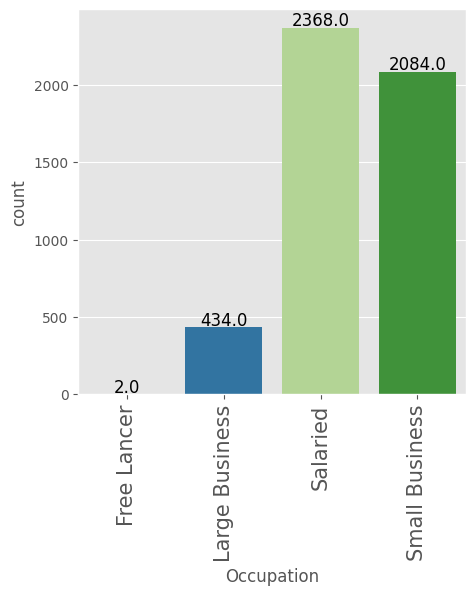

In [156]:
labeled_barplot(data, 'Occupation')

#### Observations on City Tier

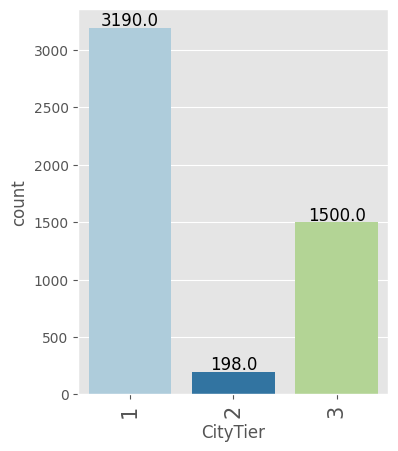

In [157]:
labeled_barplot(data, 'CityTier')

#### Observations on Gender

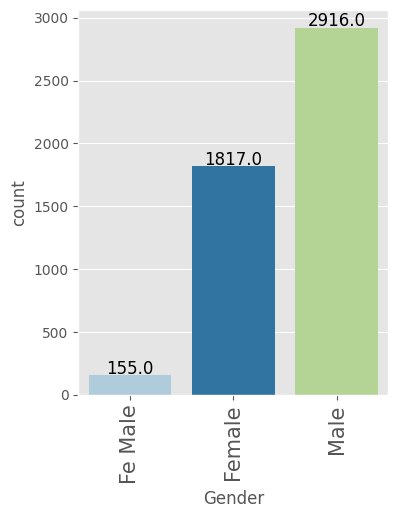

In [158]:
labeled_barplot(data, 'Gender')

#### Observations on Number of Person Visiting

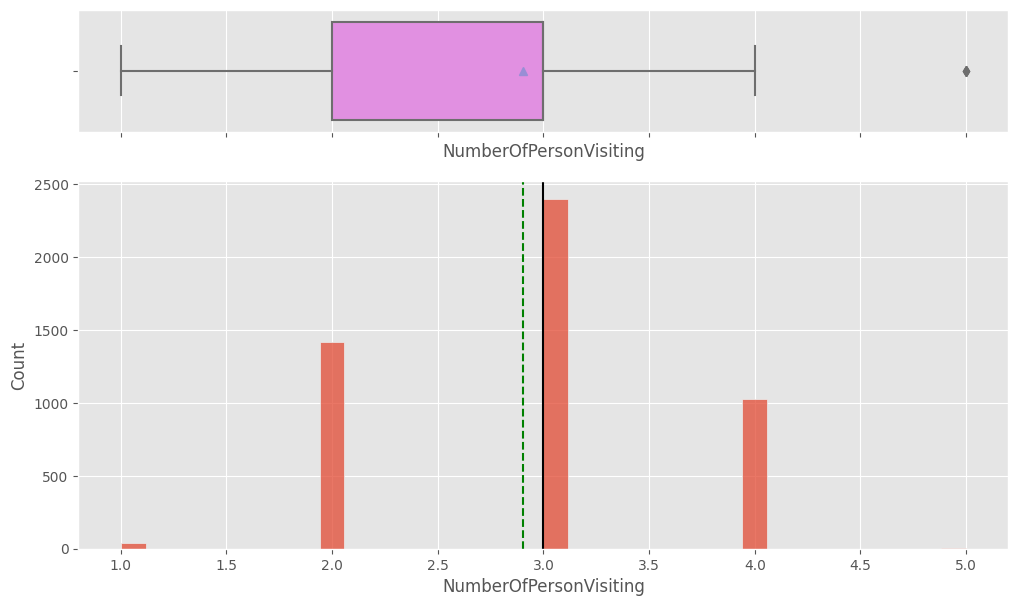

In [159]:
histogram_boxplot(data, 'NumberOfPersonVisiting')

### Observations on Occupation

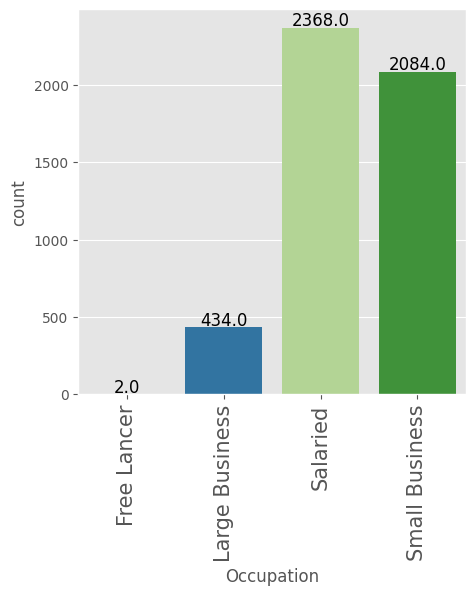

In [160]:
labeled_barplot(data, 'Occupation')

### Observations on City Tier

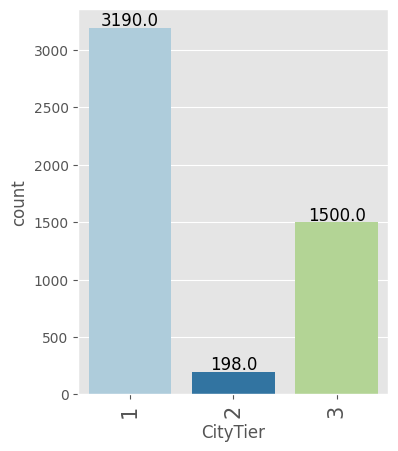

In [161]:
labeled_barplot(data, 'CityTier')

### Observations on Gender

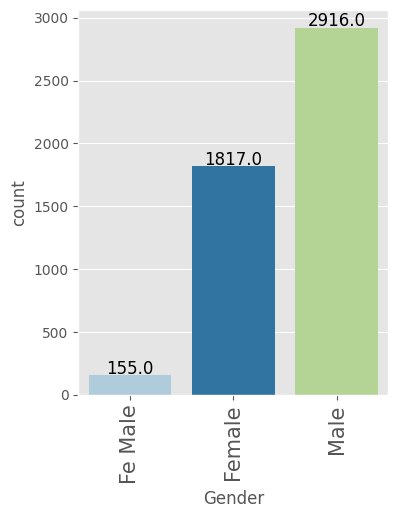

In [162]:
labeled_barplot(data, 'Gender')

#### Observations on Number of Follow ups

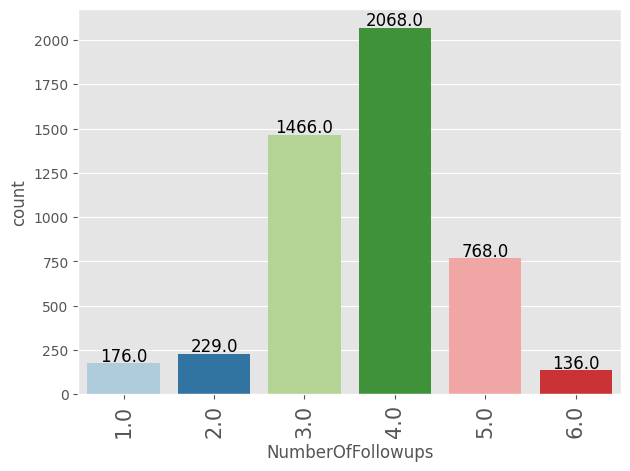

In [163]:
labeled_barplot(data, 'NumberOfFollowups')

#### Observations on Product Pitched

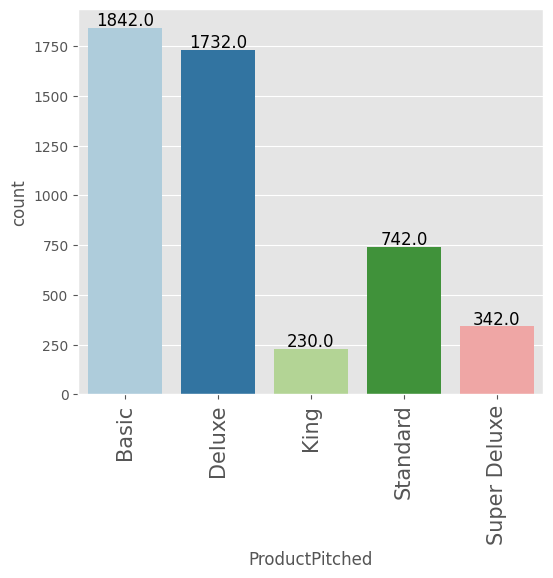

In [164]:
labeled_barplot(data, 'ProductPitched')

#### Observations on Preferred Property Star

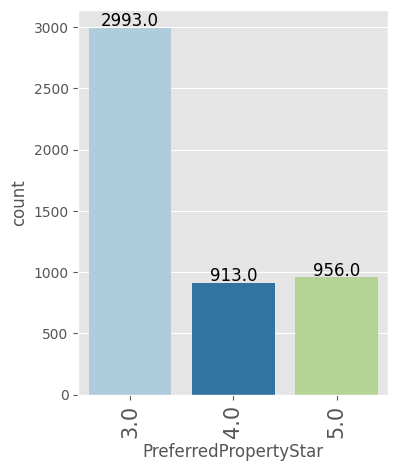

In [165]:
labeled_barplot(data, 'PreferredPropertyStar')

#### Observations on Type of Contact

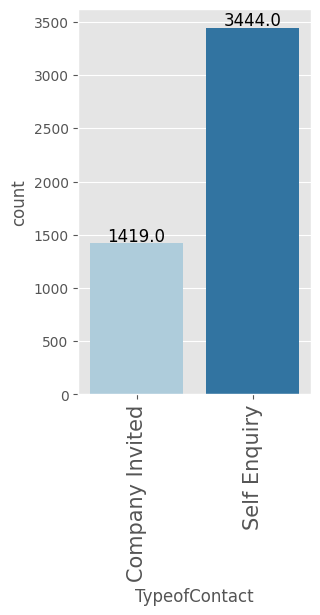

In [166]:
labeled_barplot(data, 'TypeofContact')

#### Observations on Marital Status

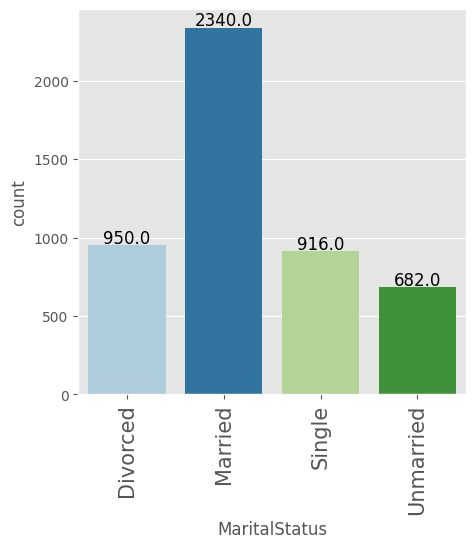

In [167]:
labeled_barplot(data, 'MaritalStatus')

#### Observations on Passport

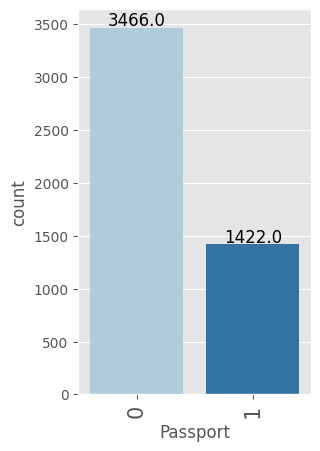

In [168]:
labeled_barplot(data, 'Passport')

#### Observations on Pitch Satisfaction Score

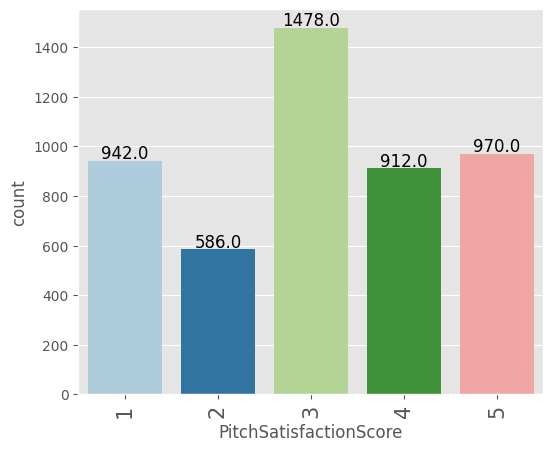

In [169]:
labeled_barplot(data, 'PitchSatisfactionScore')

#### Observations on Designation

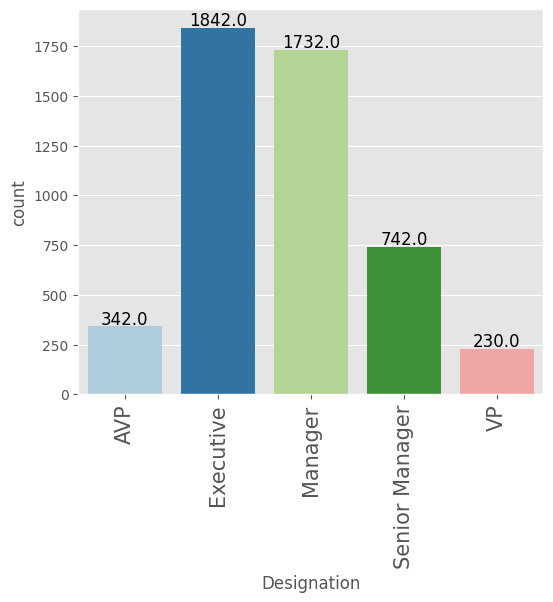

In [170]:
labeled_barplot(data, 'Designation')

#### Observations on Number of Children Visiting

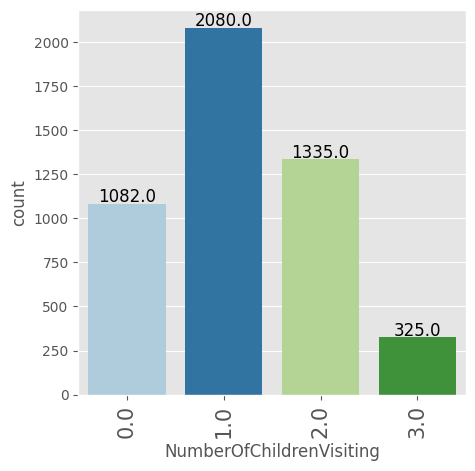

In [171]:
labeled_barplot(data, 'NumberOfChildrenVisiting')

#### Observations on Product Taken

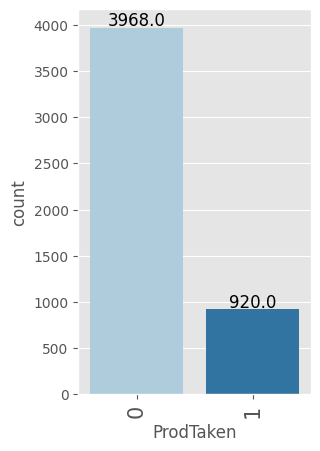

In [172]:
labeled_barplot(data, 'ProdTaken')

## Exploratory Data Analysis (Bivariate Analysis).

In [176]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation check

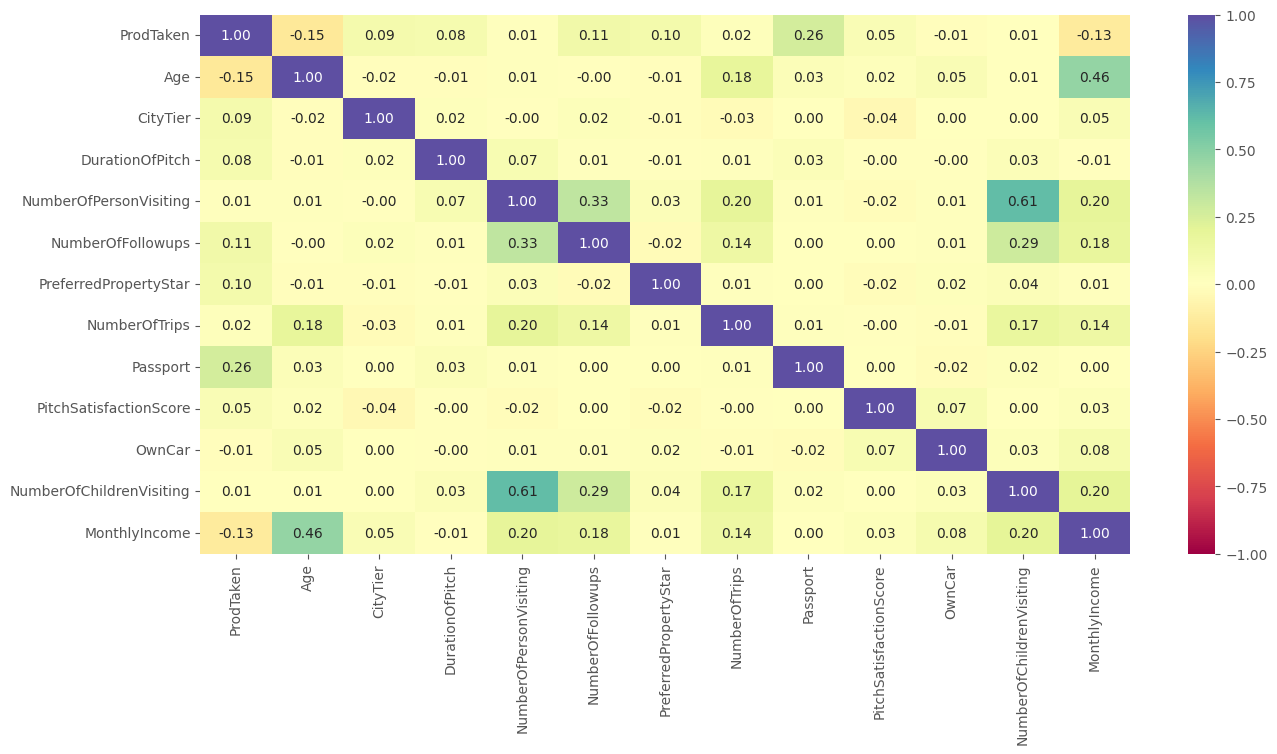

In [177]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Prod Taken vs Number of Person Visiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


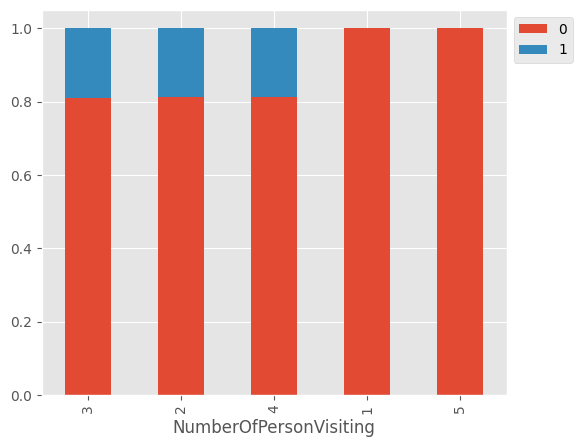

In [178]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken" )

#### Prod Taken vs Number of Follow ups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


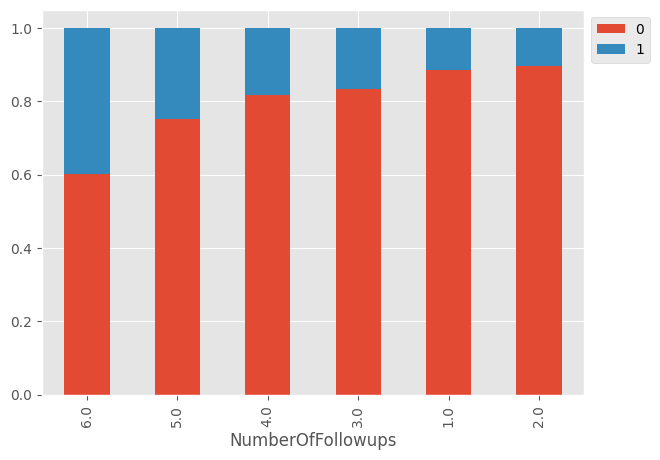

In [179]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken" )

#### Prod Taken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


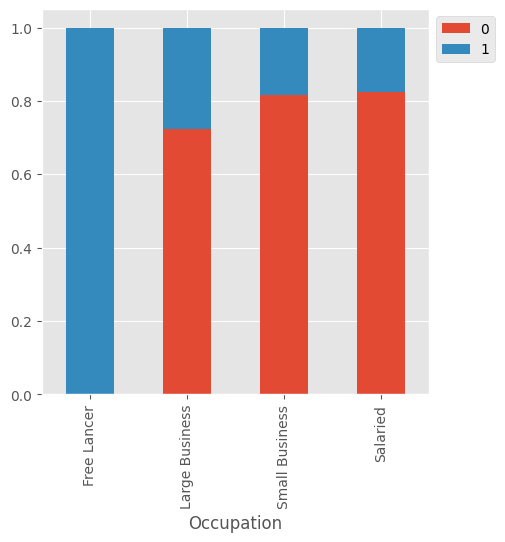

In [180]:
stacked_barplot(data, "Occupation", "ProdTaken" )

#### Prod Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


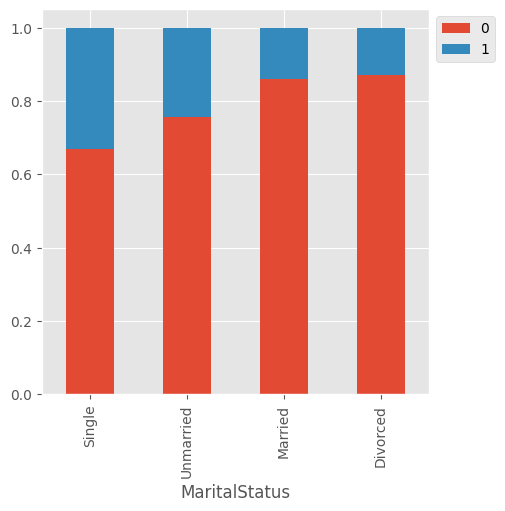

In [181]:
stacked_barplot(data, "MaritalStatus", "ProdTaken" )

#### Prod Taken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


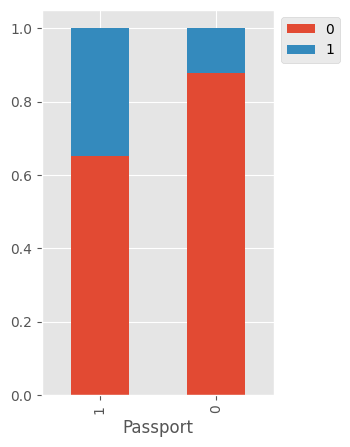

In [182]:
stacked_barplot(data, "Passport", "ProdTaken" )

#### Prod Taken vs Product Pitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


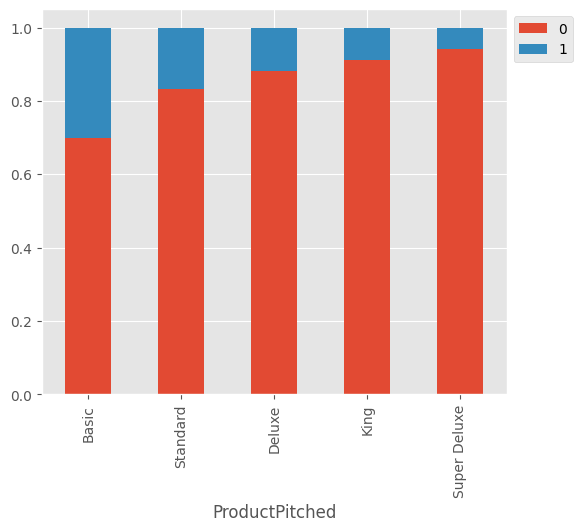

In [183]:
stacked_barplot(data, "ProductPitched", "ProdTaken" )

#### Prod Taken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


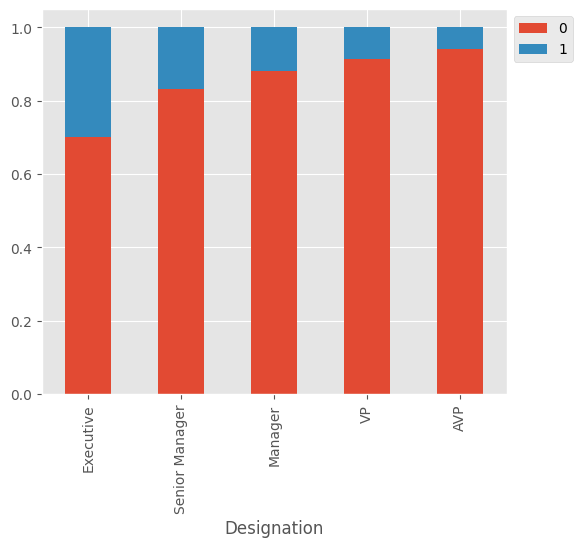

In [184]:
stacked_barplot(data, "Designation", "ProdTaken" )

#### Prod Taken vs Duration of Pitch

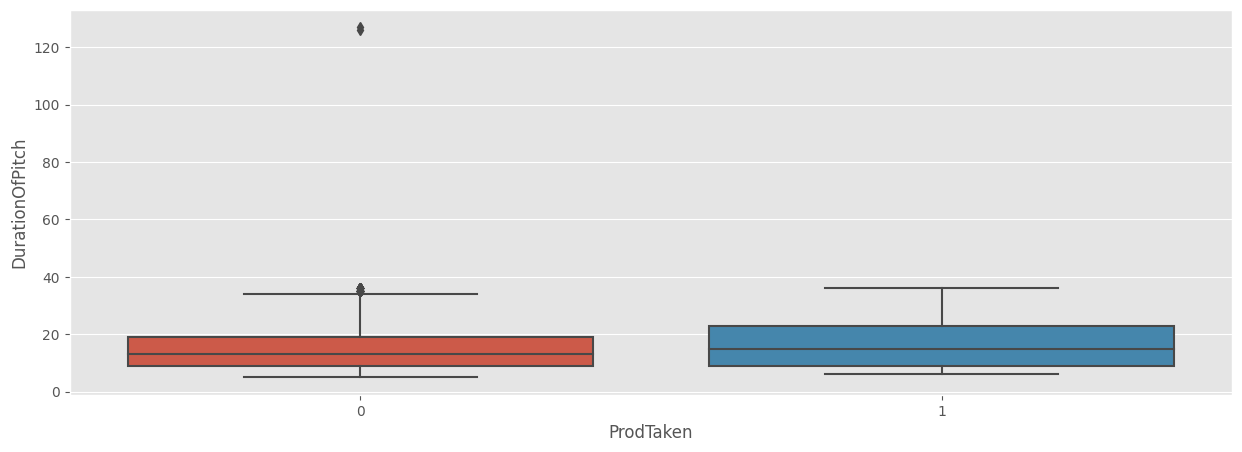

In [185]:
plt.figure(figsize=(15,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=data)
plt.show()

#### Prod Taken vs Monthly Income

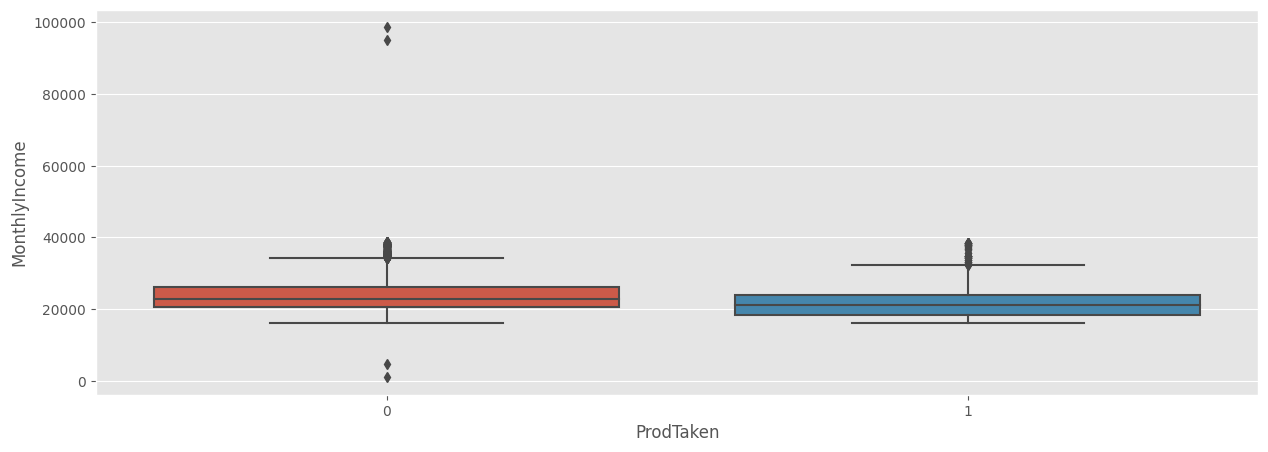

In [186]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=data)
plt.show()

#### Customer Profiles by Travel Package

In [187]:
data[(data['ProductPitched']=='Basic') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,NaN,NaN,NaN,1.51087,0.832566,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,3,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,NaN,NaN,NaN,2.905797,0.701439,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,548.0,NaN,NaN,NaN,3.95073,0.967166,1.0,3.0,4.0,5.0,6.0
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
data[(data['ProductPitched']=='Standard') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,NaN,NaN,NaN,2.096774,0.966255,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,3,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,NaN,NaN,NaN,2.967742,0.709236,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,124.0,NaN,NaN,NaN,3.935484,0.908335,1.0,3.0,4.0,4.25,6.0
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
data[(data['ProductPitched']=='Deluxe') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,NaN,NaN,NaN,2.411765,0.913532,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,3,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,NaN,NaN,NaN,2.95098,0.707141,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,200.0,NaN,NaN,NaN,3.97,1.051011,1.0,3.0,4.0,5.0,6.0
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
data[(data['ProductPitched']=='Super Deluxe') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,NaN,NaN,NaN,2.6,0.820783,1.0,3.0,3.0,3.0,3.0
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,3,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,NaN,NaN,NaN,2.7,0.656947,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,20.0,NaN,NaN,NaN,3.1,1.618967,1.0,2.0,3.0,4.0,6.0
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data[(data['ProductPitched']=='King') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,NaN,NaN,NaN,1.8,1.005249,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,NaN,NaN,NaN,2.9,0.718185,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,20.0,NaN,NaN,NaN,4.3,1.128576,3.0,3.0,4.0,5.0,6.0
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Detection and Treatment

In [192]:
100*data['NumberOfTrips'].value_counts(normalize=True)

2.0     30.834035
3.0     22.725358
1.0     13.058130
4.0     10.067397
5.0      9.646167
6.0      6.781803
7.0      4.591407
8.0      2.211457
19.0     0.021061
21.0     0.021061
20.0     0.021061
22.0     0.021061
Name: NumberOfTrips, dtype: float64

In [193]:
100*data['DurationOfPitch'].value_counts(normalize=True)

9.0      10.416217
7.0       7.375458
8.0       7.181367
6.0       6.620660
16.0      5.908993
15.0      5.801165
14.0      5.456114
10.0      5.262023
13.0      4.809144
11.0      4.420962
12.0      4.205305
17.0      3.709295
30.0      2.048738
22.0      1.919344
31.0      1.789950
23.0      1.703688
18.0      1.617425
29.0      1.595859
32.0      1.595859
25.0      1.574294
21.0      1.574294
27.0      1.552728
26.0      1.552728
24.0      1.509597
35.0      1.423334
20.0      1.401768
28.0      1.315506
33.0      1.229243
19.0      1.229243
34.0      1.078283
36.0      0.948889
5.0       0.129394
126.0     0.021566
127.0     0.021566
Name: DurationOfPitch, dtype: float64

In [194]:
100*data['MonthlyIncome'].value_counts(normalize=True)

20855.0    0.150376
21288.0    0.150376
17342.0    0.150376
21020.0    0.150376
24950.0    0.128894
             ...   
17074.0    0.021482
24250.0    0.021482
21077.0    0.021482
24714.0    0.021482
21471.0    0.021482
Name: MonthlyIncome, Length: 2475, dtype: float64

In [195]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data['DurationOfPitch']>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data['MonthlyIncome']>40000) | (data['MonthlyIncome']<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data['NumberOfTrips']>8].index,inplace=True)

### Checking for anomalies / repeated values

In [196]:
#Making a list of all categorical variables 
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Self Enquiry       3440
Company Invited    1413
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3182
3    1498
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2362
Small Business    2084
Large Business     430
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2910
Female     1813
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2397
2    1414
4    1025
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2063
3.0    1462
5.0     767
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1836
Deluxe          1728
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

In [197]:
#Replacing 'Fe Male' with 'Female'
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')

In [198]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column] = data[column].astype('category')

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   int64   
 1   Age                       4653 non-null   float64 
 2   TypeofContact             4853 non-null   category
 3   CityTier                  4878 non-null   category
 4   DurationOfPitch           4627 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   category
 7   NumberOfPersonVisiting    4878 non-null   category
 8   NumberOfFollowups         4833 non-null   category
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4853 non-null   category
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4738 non-null   float64 
 13  Passport                  4878 non-null   catego

### Missing Value Treatment and Data Preparation

In [200]:
#Separating target variable and other variables
X = data.drop(columns='ProdTaken')
Y = data['ProdTaken']

In [201]:
# The following columns won't be available at the time of prediction, so we will drop them
staleColumns = ['NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore', 'DurationOfPitch']

#Dropping columns
X.drop(columns=staleColumns, inplace=True)

In [202]:
# Now we split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [203]:
# We impute missing values using the median for continous vairables

siMedian = SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col = ['Age','MonthlyIncome','NumberOfTrips']

# Fit and transform the train data
X_train[median_imputed_col] = siMedian.fit_transform(X_train[median_imputed_col])

# Replace missing values with the median calculated using training data
X_test[median_imputed_col] = siMedian.transform(X_test[median_imputed_col])

In [204]:
# We impute missing values using the most frequent value for categorical variables

siMode = SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col = ['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

# Fit and transform the train data
X_train[mode_imputed_col] = siMode.fit_transform(X_train[mode_imputed_col])

# Replace missing values with the mode calculated using training data
X_test[mode_imputed_col] = siMode.transform(X_test[mode_imputed_col])

In [205]:
print('-'*35)
print('Missing values in training data')
print('-'*35)
print()
print(X_train.isna().sum())
print()
print('-'*35)

-----------------------------------
Missing values in training data
-----------------------------------

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

-----------------------------------


**We create dummy variables for string type variables and convert other column types back to float.**

In [206]:
# Converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column] = X_train[column].astype('float')
    X_test[column] = X_test[column].astype('float')

In [207]:
# List of columns to create dummy variables for
col_dummy = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [208]:
# One hot encoding of the categorical variables
X_train = pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test = pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

## Model Building

### Model Evaluation Criterion

The model's wrong predictions can result in two scenarios:

1. Predicting a customer will buy the product, but they don't, leading to a loss of resources.
2. Predicting a customer will not buy the product, but they actually buy, resulting in a loss of opportunity.

The case that is considered more important is when the model predicts that a customer will not buy the product, but they actually do. This scenario represents a missed opportunity for the company to generate income because the customer is not targeted by the marketing team when they should be.

Therefore, the company prioritizes maximizing recall. By focusing on maximizing recall, the company aims to minimize the instances where the model fails to identify potential customers who would purchase the product. 


**The following functions will help us to calculate the different performance metrics and also draw confusion matrixes**

In [209]:
# Function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [210]:
# Function to help draw a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building: Decision Tree

In [211]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Model Performance on training data**

In [212]:
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', d_tree_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

----------------------------------------


**Model Performance on test data**

In [213]:
d_tree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Test performance\n", '-'*40+'\n\n', d_tree_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137

----------------------------------------


**Confusion matrix for test data**

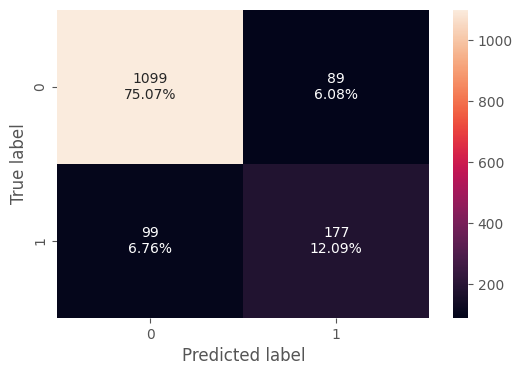

In [214]:
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Model Improvement: Decision Tree

In [215]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

**Model Performance on training data**

In [216]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', dtree_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422

----------------------------------------


**Model Performance on test data**

In [217]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Test performance\n", '-'*40+'\n\n', dtree_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781

----------------------------------------


**Confusion matrix for test data**

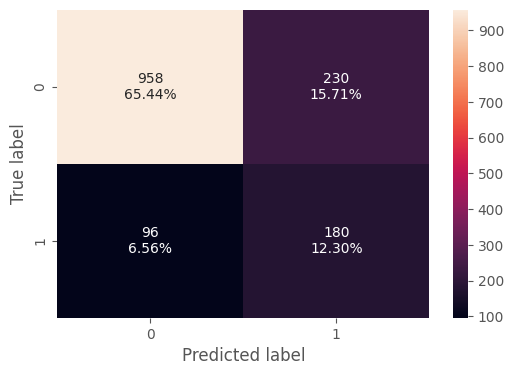

In [218]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

### Model Building: Random Forest

In [219]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Model Performance on training data**

In [220]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', rf_estimator_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

----------------------------------------


**Model Performance on test data**

In [221]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Test performance\n", '-'*40+'\n\n', rf_estimator_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy   Recall  Precision        F1
0  0.894126  0.51087   0.875776  0.645309

----------------------------------------


**Confusion matrix for test data**

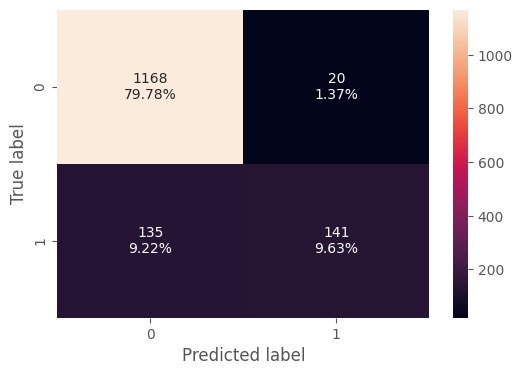

In [222]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

### Model Improvement: Random Forest

In [223]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82}, random_state=1, oob_score=True, bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10),
              }

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_leaf=11, n_estimators=60,
                       oob_score=True, random_state=1)

**Model Performance on training data**

In [224]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', rf_tuned_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316

----------------------------------------


**Model Performance on test data**

In [225]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', rf_tuned_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316

----------------------------------------


**Confusion matrix for test data**

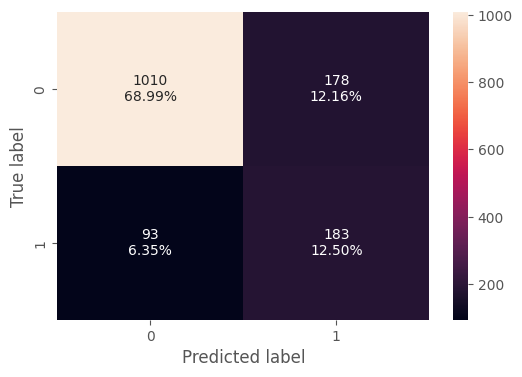

In [226]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Model Building: Bagging

In [227]:
# Initializing the Bagging classifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

**Model Performance on training data**

In [228]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', bagging_classifier_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705

----------------------------------------


**Model Performance on test data**

In [229]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', bagging_classifier_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705

----------------------------------------


**Confusion matrix for test data**

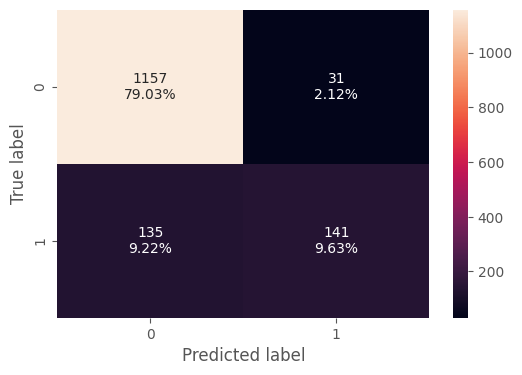

In [230]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### Model Improvement: Bagging 

In [231]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

**Model Performance on training data**

In [232]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', bagging_estimator_tuned_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658

----------------------------------------


**Model Performance on test data**

In [233]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', bagging_estimator_tuned_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658

----------------------------------------


**Confusion matrix for test data**

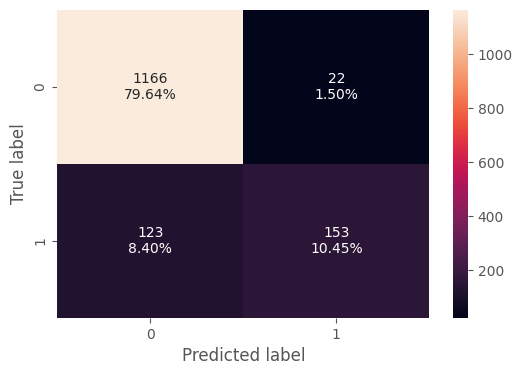

In [234]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Model Building: AdaBoost 

In [235]:
# Initializing the AdaBoost classifier model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

**Model Performance on training data**

In [236]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', ab_classifier_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.845343  0.299065   0.711111  0.421053

----------------------------------------


**Model Performance on test data**

In [237]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', ab_classifier_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.845343  0.299065   0.711111  0.421053

----------------------------------------


**Confusion matrix for test data**

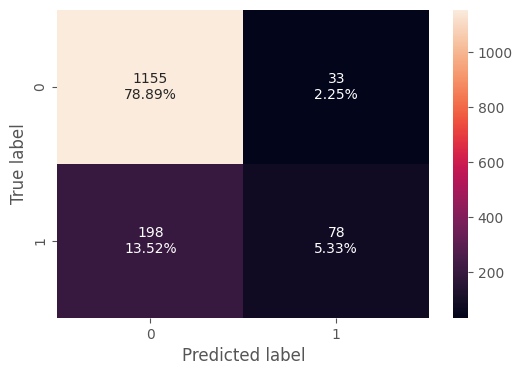

In [238]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

### Model Improvement: AdaBoost

In [239]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

**Model Performance on training data**

In [240]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', abc_tuned_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0   0.98389  0.929907   0.983526  0.955965

----------------------------------------


**Model Performance on test data**

In [241]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', abc_tuned_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0   0.98389  0.929907   0.983526  0.955965

----------------------------------------


**Confusion matrix for test data**

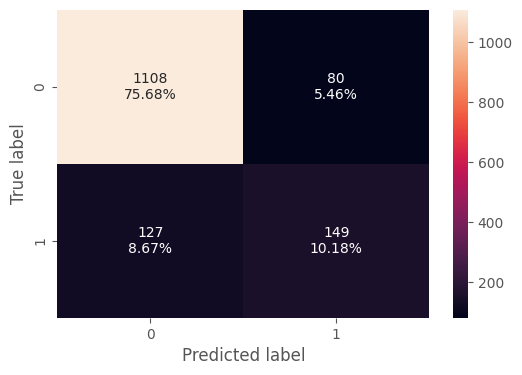

In [242]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Model Building: Gradient Boosting

In [243]:
# Initializing the Gradient bossting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

**Model Performance on training data**

In [244]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', gb_classifier_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196

----------------------------------------


**Model Performance on test data**

In [245]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', gb_classifier_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196

----------------------------------------


**Confusion matrix for test data**

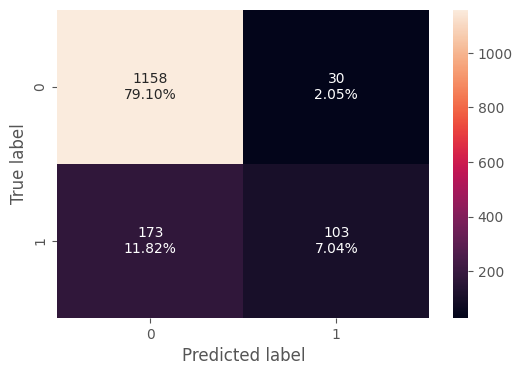

In [246]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

### Model Improvement: Gradient Boosting


In [247]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

**Model Performance on training data**

In [248]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', gbc_tuned_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.910662  0.587227   0.904077  0.711992

----------------------------------------


**Model Performance on test data**

In [249]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', gbc_tuned_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.910662  0.587227   0.904077  0.711992

----------------------------------------


**Confusion matrix for test data**

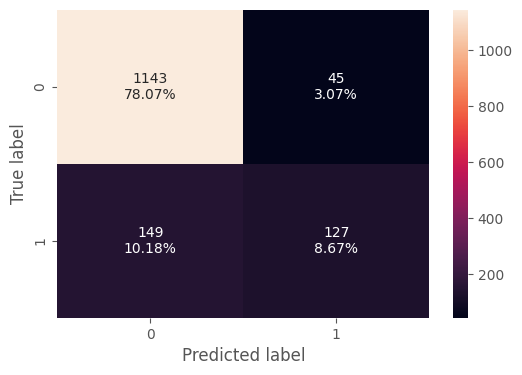

In [250]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### Model Building: XGBoost

**Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost, and there will no points deducted if XG-boost is not performed**

**Model Performance on training data**

**Model Performance on test data**

**Confusion matrix for test data**

### Model Improvement: XGBoost


**Model Performance on training data**

**Model Performance on test data**

**Confusion matrix for test data**

### Model Building: Stacking

In [255]:
# Initializing different models
estimators = [
                ('Random Forest', rf_tuned),
                ('Gradient Boosting', gbc_tuned),
                ('Decision Tree', dtree_estimator),
            ]

final_estimator = gb_classifier

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_leaf=11,
                                                       n_estimators=60,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.72},
                                                       max_depth=5,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=10,
                                                       random_state=1))],
                   final_estimator=GradientBoostingClassifier(random_state=1))

**Model Performance on training data**

In [256]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
print("Training performance\n", '-'*40+'\n\n', stacking_classifier_model_train_perf)
print('\n'+'-'*40)

Training performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.927358  0.728972   0.863469  0.790541

----------------------------------------


**Model Performance on test data**

In [257]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
print("Test performance\n", '-'*40+'\n\n', stacking_classifier_model_test_perf)
print('\n'+'-'*40)

Test performance
 ----------------------------------------

    Accuracy    Recall  Precision        F1
0  0.927358  0.728972   0.863469  0.790541

----------------------------------------


**Confusion matrix for test data**

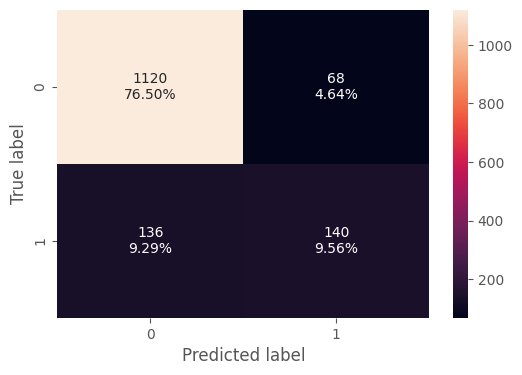

In [258]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Model Improvement: Stacking


**Model Performance on training data**

**Model Performance on test data**

**Confusion matrix for test data**

## Model Comparison and Final Model Selection

In [259]:
# Model performance comparison for training data

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_model_train_perf.T,
     
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
     
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
     
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
     
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
     
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Estimator",
        "Random Forest Estimator",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adaboost Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "Stacking Classifier",
]

print("Training performance comparison:")
print('-' * 40)
print()
models_train_comp_df

Training performance comparison:
----------------------------------------



,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.803456,1.0,0.891330,0.990334,0.999121,0.845343,0.983890,0.878735,0.910662,0.927358
Recall,1.0,0.663551,1.0,0.881620,0.951713,0.995327,0.299065,0.929907,0.433022,0.587227,0.728972
Precision,1.0,0.483541,1.0,0.657375,0.996737,1.000000,0.711111,0.983526,0.847561,0.904077,0.863469
F1,1.0,0.559422,1.0,0.753160,0.973705,0.997658,0.421053,0.955965,0.573196,0.711992,0.790541


In [260]:
# Model performance comparison for test data

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_model_test_perf.T,
     
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
     
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
     
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
     
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
     
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Estimator",
        "Random Forest Estimator",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adaboost Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "Stacking Classifier",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,0.871585,0.777322,0.894126,0.891330,0.990334,0.999121,0.845343,0.983890,0.878735,0.910662,0.927358
Recall,0.641304,0.652174,0.510870,0.881620,0.951713,0.995327,0.299065,0.929907,0.433022,0.587227,0.728972
Precision,0.665414,0.439024,0.875776,0.657375,0.996737,1.000000,0.711111,0.983526,0.847561,0.904077,0.863469
F1,0.653137,0.524781,0.645309,0.753160,0.973705,0.997658,0.421053,0.955965,0.573196,0.711992,0.790541


## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the Visit with us company?**

___